In [0]:
# https://www.datacamp.com/courses/merging-dataframes-with-pandas

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Timestamp

## 1. Preparing data

#### Reading multiple data files

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv('Bronze.csv')

In [0]:
# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv('Silver.csv')

In [0]:
# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv('Gold.csv')

In [0]:
# Print the first five rows of gold
print(gold.head(5))

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


**Reading DataFrames from multiple files in a loop**

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Create the list of file names: filenames
filenames = ['Gold.csv', 'Silver.csv', 'Bronze.csv']

In [0]:
# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

In [0]:
# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head(5))

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


**Combining DataFrames from multiple data files**

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Make a copy of gold: medals
medals = gold.copy()

In [0]:
# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

In [0]:
# Rename the columns of medals using new_labels
medals.columns = new_labels

In [0]:
# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

In [0]:
# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


#### Reindexing DataFrames

**Sorting DataFrame with the Index & columns**

The principal methods are .sort_index() and .sort_values().

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv('monthly_max_temp.csv', index_col='Month')

In [0]:
# Print the head of weather1
print(weather1.head())

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88


In [0]:
# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

In [0]:
# Print the head of weather2
print(weather2.head())

       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68


In [0]:
# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

In [0]:
# Print the head of weather3
print(weather3.head())

       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68


In [0]:
# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

In [0]:
# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Feb                  60
Jan                  68
Mar                  68
Dec                  68
Nov                  72


**Reindexing DataFrame from a list**

Sorting methods are not the only way to change DataFrame Indexes. There is also the .reindex() method.

In this exercise, you'll reindex a DataFrame of quarterly-sampled mean temperature values to contain monthly samples (this is an example of upsampling or increasing the rate of samples, which you may recall from the pandas Foundations course).

In [0]:
# Import pandas
import pandas as pd

In [0]:
year = ['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [0]:
# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

In [0]:
# Print weather2
print(weather2)

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
Jun                  89
Jul                  91
Aug                  86
Sep                  90
Oct                  84
Nov                  72
Dec                  68




*   Reorder the rows of weather1 just as you did above, this time chaining the .ffill() method to replace the null values with the last preceding non-null value.



In [0]:
# Reindex weather1 using the list year with forward-fill: weather3
weather3 =  weather1.reindex(year).ffill()

In [0]:
# Print weather3
print(weather3)

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
Jun                  89
Jul                  91
Aug                  86
Sep                  90
Oct                  84
Nov                  72
Dec                  68


**Reindexing using another DataFrame Index**

The Baby Names Dataset from data.gov summarizes counts of names (with genders) from births registered in the US since 1881. In this exercise, you will start with two baby-names DataFrames names_1981 and names_1881 loaded for you.

Your job here is to use the DataFrame .reindex() and .dropna() methods to make a DataFrame common_names counting names from 1881 that were still popular in 1981.

In [0]:
# Import pandas
import pandas as pd

In [0]:
# additional steps to load datasets
names_1981_r = pd.read_csv('names1981.csv', header=None)
names_1981_r.columns = ['name', 'gender', 'count']
names_1981_r.head(5)

,name,gender,count
0,Jennifer,F,57032
1,Jessica,F,42519
2,Amanda,F,34370
3,Sarah,F,28162
4,Melissa,F,28003


In [0]:
names_1981 = names_1981_r.set_index(['name', 'gender'])
names_1981.shape # (19455, 1)

(19455, 1)

In [0]:
# additional steps to load datasets
names_1881_r = pd.read_csv('names1881.csv', header=None)
names_1881_r.columns = ['name', 'gender', 'count']
names_1881_r.head(5)

,name,gender,count
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [0]:
names_1881 = names_1881_r.set_index(['name', 'gender'])
names_1881.shape # (1935, 1)

(1935, 1)

In [0]:
# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

In [0]:
# Print shape of common_names
print(common_names.shape)


(1935, 1)


In [0]:
# Drop rows with null counts: common_names
common_names = common_names.dropna()

In [0]:
# Print shape of new common_names
print(common_names.shape)

(1587, 1)


#### Arithmetic with Series & DataFrame Index

**Broadcasting in arithmetic formulas**

In [0]:
weather = pd.read_csv('pittsburgh2013.csv', index_col=0)
weather.shape # 365

(365, 22)

In [0]:
weather.head(5)

,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressureIn,Mean Sea Level PressureIn,Min Sea Level PressureIn,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,,
2013-1-1,32,28,21,30,27,16,100,89,77,30.10,30.01,29.94,10,6,2,10,8,NaN,0.00,8,Snow,277
2013-1-2,25,21,17,14,12,10,77,67,55,30.27,30.18,30.08,10,10,10,14,5,NaN,0.00,4,NaN,272
2013-1-3,32,24,16,19,15,9,77,67,56,30.25,30.21,30.16,10,10,10,17,8,26.0,0.00,3,NaN,229
2013-1-4,30,28,27,21,19,17,75,68,59,30.28,30.21,30.12,10,10,6,23,16,32.0,0.00,4,NaN,250
2013-1-5,34,30,25,23,20,16,75,68,61,30.42,30.30,30.17,10,10,10,16,10,23.0,0.21,5,NaN,221




*   Create a new DataFrame temps_f by extracting the columns 'Min TemperatureF', 'Mean TemperatureF', & 'Max TemperatureF' from weather as a new DataFrame temps_f. To do this, pass the relevant columns as a list to weather[].



In [0]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF','Mean TemperatureF','Max TemperatureF']]



*   Create a new DataFrame temps_c from temps_f using the formula (temps_f - 32) * 5/9.


In [0]:
# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9



*   Rename the columns of temps_c to replace 'F' with 'C' using the .str.replace('F', 'C') method on temps_c.columns.



In [0]:
# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

In [0]:
# Print first 5 rows of temps_c
print(temps_c.head())

          Min TemperatureC  Mean TemperatureC  Max TemperatureC
Date                                                           
2013-1-1         -6.111111          -2.222222          0.000000
2013-1-2         -8.333333          -6.111111         -3.888889
2013-1-3         -8.888889          -4.444444          0.000000
2013-1-4         -2.777778          -2.222222         -1.111111
2013-1-5         -3.888889          -1.111111          1.111111


**Computing percentage growth of GDP**


Your job in this exercise is to compute the yearly percent-change of US GDP (Gross Domestic Product) since 2008.

In [0]:
# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv('gdp_usa.csv',  # change filename accordingly
                  index_col='DATE', parse_dates=True)

In [0]:
# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp['2008':]

In [0]:
# Print the last 8 rows of post2008
print(post2008.tail(8))

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5


In [0]:
# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

In [0]:
# Print yearly
print(yearly)

              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5


In [0]:
# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

In [0]:
# Print yearly again
print(yearly)

              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


**Converting currency of stocks**

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv('sp500.csv',index_col='Date', parse_dates=True)

In [0]:
sp500.head(5)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,2058.199951
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,2020.579956
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,2002.609985
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,2025.900024
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,2062.139893


In [0]:
# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv('exchange.csv',index_col='Date', parse_dates=True)

In [0]:
exchange.head(5)

,GBP/USD
Date,
2015-01-02,0.65101
2015-01-05,0.65644
2015-01-06,0.65896
2015-01-07,0.66344
2015-01-08,0.66151


In [0]:
# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open','Close']]

In [0]:
# Print the head of dollars
print(dollars.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893


In [0]:
# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'], axis='rows')

In [0]:
# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


## 2. Concatenating data

#### Appending & concatenating Series



*   Read the files 'sales-jan-2015.csv', 'sales-feb-2015.csv' and 'sales-mar-2015.csv' into the DataFrames jan, feb, and mar respectively.

*   Use parse_dates=True and index_col='Date'.
*   Extract the 'Units' column of jan, feb, and mar to create the Series jan_units, feb_units, and mar_units respectively.


*   Construct the Series quarter1 by appending feb_units to jan_units and then appending mar_units to the result. Use chained calls to the .append() method to do this.



In [0]:
# Import pandas
import pandas as pd

In [0]:
# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv('sales-jan-2015.csv', index_col='Date', parse_dates=True)

In [0]:
jan.head(5)

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17
2015-01-02 09:51:06,Hooli,Hardware,16
2015-01-11 14:51:02,Hooli,Hardware,11


In [0]:
# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv('sales-feb-2015.csv', index_col='Date', parse_dates=True)

In [0]:
feb.head(5)

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [0]:
# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv('sales-mar-2015.csv', index_col='Date', parse_dates=True)

In [0]:
mar.head(5)

,Company,Product,Units
Date,,,
2015-03-22 14:42:25,Mediacore,Software,6
2015-03-12 18:33:06,Initech,Service,19
2015-03-22 03:58:28,Streeplex,Software,8
2015-03-15 00:53:12,Hooli,Hardware,19
2015-03-17 19:25:37,Hooli,Hardware,10


In [0]:
# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

In [0]:
# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

In [0]:
# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

In [0]:
# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

In [0]:
# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64


In [0]:
# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


In [0]:
# Compute & print total sales in quarter1
print(quarter1.sum())

642


**Concatenating pandas Series along row axis**

Your job is to use pd.concat() with a list of Series to achieve the same result that you would get by chaining calls to .append().

In [0]:
# Initialize empty list: units
units = []

In [0]:
# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

In [0]:
# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

In [0]:
# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
Name: Units, dtype: int64
Date
2015-02-26 08:57:45     4
2015-02-26 08:58:51     1
2015-03-06 10:11:45    17
2015-03-06 02:03:56    17
Name: Units, dtype: int64


#### Appending & concatenating DataFrames

In [0]:
# no index columns
names_1981 = pd.read_csv('names1981.csv')
names_1981.columns = ['name', 'gender', 'count']
names_1981.head(5)

,name,gender,count
0,Jessica,F,42519
1,Amanda,F,34370
2,Sarah,F,28162
3,Melissa,F,28003
4,Amy,F,20337


In [0]:
# re-load dataset without setting index columns
names_1881 = pd.read_csv('names1881.csv')
names_1881.columns = ['name', 'gender', 'count']
names_1881.head(5)

,name,gender,count
0,Anna,F,2698
1,Emma,F,2034
2,Elizabeth,F,1852
3,Margaret,F,1658
4,Minnie,F,1653


You'll use the DataFrame .append() method to make a DataFrame combined_names. To distinguish rows from the original two DataFrames, you'll add a 'year' column to each with the year (1881 or 1981 in this case). In addition, you'll specify ignore_index=True so that the index values are not used along the concatenation axis. The resulting axis will instead be labeled 0, 1, ..., n-1, which is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information.

In [0]:
# Add 'year' column to names_1881 & names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

In [0]:
# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

In [0]:
combined_names.head(5)

,name,gender,count,year
0,Anna,F,2698,1881
1,Emma,F,2034,1881
2,Elizabeth,F,1852,1881
3,Margaret,F,1658,1881
4,Minnie,F,1653,1881


In [0]:
# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)


(19454, 4)
(1934, 4)
(21388, 4)


In [0]:
# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name']=='Morgan'])

         name gender  count  year
1282   Morgan      M     23  1881
2094   Morgan      F   1769  1981
14388  Morgan      M    766  1981


**Concatenating pandas DataFrames along column axis**

In [0]:
weather_max_np = np.array([['Jan', 68],
       ['Apr', 89],
       ['Jul', 91],
       ['Oct', 84]], dtype=object)

In [0]:
weather_max = pd.DataFrame(weather_max_np)
weather_max.columns = ['Month', 'Max TemperatureF']
weather_max

,Month,Max TemperatureF
0,Jan,68
1,Apr,89
2,Jul,91
3,Oct,84


In [0]:
# match dataset
weather_max.set_index('Month', inplace=True, drop=True)
weather_max

,Max TemperatureF
Month,
Jan,68
Apr,89
Jul,91
Oct,84


In [0]:
weather_mean = pd.read_csv('monthly_mean_temp.csv', index_col=0)
weather_mean

,Mean TemperatureF
Jan,32.354839
Feb,28.714286
Mar,35.000000
Apr,53.100000
May,62.612903
Jun,70.133333
Jul,72.870968
Aug,70.000000
Sep,63.766667
Oct,55.451613


In [0]:
# Create a list of weather_max and weather_mean
weather_list = [weather_max, weather_mean]

Create a new DataFrame called weather by concatenating weather_list horizontally.

*   Pass the list to pd.concat() and specify the keyword argument axis=1 to stack them horizontally.



In [0]:
# Concatenate weather_list horizontally
weather = pd.concat(weather_list, axis=1) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
# Print weather
print(weather)

    Max TemperatureF  Mean TemperatureF
Apr               89          53.100000
Aug              NaN          70.000000
Dec              NaN          34.935484
Feb              NaN          28.714286
Jan               68          32.354839
Jul               91          72.870968
Jun              NaN          70.133333
Mar              NaN          35.000000
May              NaN          62.612903
Nov              NaN          39.800000
Oct               84          55.451613
Sep              NaN          63.766667


**Reading multiple files to build a DataFrame**

It is often convenient to build a large DataFrame by parsing many files as DataFrames and concatenating them all at once. You'll do this here with three files, but, in principle, this approach can be used to combine data from dozens or hundreds of files.

In [0]:
medal_types = ['bronze', 'silver', 'gold']

In [0]:
medals = []

In [0]:
for medal in medal_types:
    
    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name,header=0, index_col='Country',names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals,axis='columns')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [0]:
# Print medals
print(medals)

                bronze  silver    gold
France           475.0   461.0     NaN
Germany          454.0     NaN   407.0
Italy              NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0


#### Concatenation, keys & MultiIndexes

**Concatenating vertically to get MultiIndexed rows**

When stacking a sequence of DataFrames vertically, it is sometimes desirable to construct a MultiIndex to indicate the DataFrame from which each row originated. This can be done by specifying the keys parameter in the call to pd.concat(), which generates a hierarchical index with the labels from keys as the outermost index label. 

In [0]:
medals = []

In [0]:
medal_types = ['bronze', 'silver', 'gold']

In [0]:
for medal in medal_types:
    
    file_name = "%s_top5.csv" % medal

    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

In [0]:
# Print medals
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


**Slicing MultiIndexed DataFrames**

You are provided with the MultiIndexed DataFrame as produced at the end of the preceding exercise. Your task is to sort the DataFrame and to use the pd.IndexSlice to extract specific slices. 

In [0]:
medals

Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0

In [0]:
# Sort the entries of medals: medals_sorted
medals_sorted = pd.DataFrame(medals).sort_index(level=0)

In [0]:
medals_sorted

Total
       Country               
bronze France           475.0
       Germany          454.0
       Soviet Union     584.0
       United Kingdom   505.0
       United States   1052.0
gold   Germany          407.0
       Italy            460.0
       Soviet Union     838.0
       United Kingdom   498.0
       United States   2088.0
silver France           461.0
       Italy            394.0
       Soviet Union     627.0
       United Kingdom   591.0
       United States   1195.0

In [0]:
# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

Total    454.0
Name: (bronze, Germany), dtype: float64


In [0]:
# Print data about silver medals
print(medals_sorted.loc['silver'])

                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0


In [0]:
# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

In [0]:
# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


**Concatenating horizontally to get MultiIndexed columns**

Your task is to concatenate the DataFrames horizontally and to create a MultiIndex on the columns. From there, you can summarize the resulting DataFrame and slice some information from it.

In [0]:
df_hardware = pd.read_csv('feb-sales-Hardware.csv', index_col=0)
df_hardware

,Company,Product,Units
Date,,,
2015-02-04 21:52:45,Acme Coporation,Hardware,14
2015-02-07 22:58:10,Acme Coporation,Hardware,1
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-21 20:41:47,Hooli,Hardware,3


In [0]:
df_software = pd.read_csv('feb-sales-Software.csv', index_col=0)
df_software

,Company,Product,Units
Date,,,
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-11 20:03:08,Initech,Software,7
2015-02-09 13:09:55,Mediacore,Software,7
2015-02-11 22:50:44,Hooli,Software,4
2015-02-04 15:36:29,Streeplex,Software,13
2015-02-21 05:01:26,Mediacore,Software,3


In [0]:
df_service = pd.read_csv('feb-sales-Service.csv', index_col=0)
df_service

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-25 00:29:00,Initech,Service,10
2015-02-09 08:57:30,Streeplex,Service,19
2015-02-26 08:58:51,Streeplex,Service,1
2015-02-05 22:05:03,Hooli,Service,10
2015-02-19 16:02:58,Mediacore,Service,10


In [0]:
dataframes = [df_hardware, df_software, df_service]

In [0]:
dataframes[0]

,Company,Product,Units
Date,,,
2015-02-04 21:52:45,Acme Coporation,Hardware,14
2015-02-07 22:58:10,Acme Coporation,Hardware,1
2015-02-19 10:59:33,Mediacore,Hardware,16
2015-02-02 20:54:49,Mediacore,Hardware,9
2015-02-21 20:41:47,Hooli,Hardware,3




*   Construct a new DataFrame february with MultiIndexed columns by concatenating the list dataframes.

*   Use axis=1 to stack the DataFrames horizontally and the keyword argument keys=['Hardware', 'Software', 'Service'] to construct a hierarchical Index from each DataFrame.
*   Print summary information from the new DataFrame february using the .info() method. This has been done for you.


*   Create an alias called idx for pd.IndexSlice.


*   Extract a slice called slice_2_8 from february (using .loc[] & idx) that comprises rows between Feb. 2, 2015 to Feb. 8, 2015 from columns under 'Company'.
*   Print the slice_2_8. 





In [0]:
# Concatenate dataframes: february
february = pd.concat(dataframes, keys=['Hardware','Software','Service'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
# change to datetime index
february.index = pd.to_datetime(february.index)
february.head(5)

Hardware                  ... Service              
                             Company   Product Units  ... Company Product Units
2015-02-02 08:33:01              NaN       NaN   NaN  ...     NaN     NaN   NaN
2015-02-02 20:54:49        Mediacore  Hardware   9.0  ...     NaN     NaN   NaN
2015-02-03 14:14:18              NaN       NaN   NaN  ...     NaN     NaN   NaN
2015-02-04 15:36:29              NaN       NaN   NaN  ...     NaN     NaN   NaN
2015-02-04 21:52:45  Acme Coporation  Hardware  14.0  ...     NaN     NaN   NaN

[5 rows x 9 columns]

In [0]:
# Print february.info()
print(february.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Software, Company)    9 non-null object
(Software, Product)    9 non-null object
(Software, Units)      9 non-null float64
(Service, Company)     6 non-null object
(Service, Product)     6 non-null object
(Service, Units)       6 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None


In [0]:
# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

In [0]:
# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-2-2':'2015-2-8', idx[:,'Company']]
# must make sure index is datetime index

In [0]:
# Print slice_2_8
print(slice_2_8)

                            Hardware         Software Service
                             Company          Company Company
2015-02-02 08:33:01              NaN            Hooli     NaN
2015-02-02 20:54:49        Mediacore              NaN     NaN
2015-02-03 14:14:18              NaN          Initech     NaN
2015-02-04 15:36:29              NaN        Streeplex     NaN
2015-02-04 21:52:45  Acme Coporation              NaN     NaN
2015-02-05 01:53:06              NaN  Acme Coporation     NaN
2015-02-05 22:05:03              NaN              NaN   Hooli
2015-02-07 22:58:10  Acme Coporation              NaN     NaN


**Concatenating DataFrames from a dict**

In [0]:
jan = pd.read_csv('sales-jan-2015.csv', index_col=0)
jan.head(3)

,Company,Product,Units
Date,,,
2015-01-21 19:13:21,Streeplex,Hardware,11
2015-01-09 05:23:51,Streeplex,Service,8
2015-01-06 17:19:34,Initech,Hardware,17


In [0]:
feb = pd.read_csv('sales-feb-2015.csv', index_col=0)
feb.head(3)

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13


In [0]:
mar = pd.read_csv('sales-mar-2015.csv', index_col=0)
mar.head(3)

,Company,Product,Units
Date,,,
2015-03-22 14:42:25,Mediacore,Software,6
2015-03-12 18:33:06,Initech,Service,19
2015-03-22 03:58:28,Streeplex,Software,8




*   Create a list called month_list consisting of the tuples ('january', jan), ('february', feb), and ('march', mar).




In [0]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]



*   Create an empty dictionary called month_dict.



In [0]:
# Create an empty dictionary: month_dict
month_dict = {}



*   Inside the for loop:
Group month_data by 'Company' and use .sum() to aggregate.



In [0]:
for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()



*   Construct a new DataFrame called sales by concatenating the DataFrames stored in month_dict.



In [0]:
# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

In [0]:
# Print sales
print(sales)

                          Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation      5
         Hooli               37
         Initech             68
         Mediacore           68
         Streeplex           40




*   Create an alias for pd.IndexSlice and print all sales by 'Mediacore'. 


In [0]:
# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                    Units
         Company         
february Mediacore     45
january  Mediacore     15
march    Mediacore     68


#### Outer & inner joins

In [0]:
bronze = pd.read_csv('bronze_top5.csv', index_col=0)
bronze

,Total
Country,
United States,1052.0
Soviet Union,584.0
United Kingdom,505.0
France,475.0
Germany,454.0


In [0]:
silver = pd.read_csv('silver_top5.csv', index_col=0)
silver

,Total
Country,
United States,1195.0
Soviet Union,627.0
United Kingdom,591.0
France,461.0
Italy,394.0


In [0]:
gold = pd.read_csv('gold_top5.csv', index_col=0)
gold

,Total
Country,
United States,2088.0
Soviet Union,838.0
United Kingdom,498.0
Italy,460.0
Germany,407.0




*   Construct a list of DataFrames called medal_list with entries bronze, silver, and gold.
*   Concatenate medal_list horizontally with an inner join to create medals.



> *   Use the keyword argument keys=['bronze', 'silver', 'gold'] to yield suitable hierarchical indexing.

> *   Use axis=1 to get horizontal concatenation.
> *   Use join='inner' to keep only rows that share common index labels.






In [0]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

In [0]:
# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

In [0]:
# Print medals
print(medals)

                bronze  silver    gold
                 Total   Total   Total
Country                               
United States   1052.0  1195.0  2088.0
Soviet Union     584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0


**Resampling & concatenating DataFrames with inner join**

n this exercise, you'll compare the historical 10-year GDP (Gross Domestic Product) growth in the US and in China. The data for the US starts in 1947 and is recorded quarterly; by contrast, the data for China starts in 1961 and is recorded annually.

You'll need to use a combination of resampling and an inner join to align the index labels. You'll need an appropriate offset alias for resampling, and the method .resample() must be chained with some kind of aggregation method (.pct_change() and .last() in this case).

In [0]:
china = pd.read_csv('gdp_china.csv', index_col=0)
# match datatset
china.head(5)

,China
Year,
1961,49.557050
1962,46.685178
1963,50.097303
1964,59.062255
1965,69.709153


In [0]:
china.tail(5)

,China
Year,
2011,7492.432098
2012,8461.623163
2013,9490.602600
2014,10351.111760
2015,10866.444000


In [0]:
date_range = pd.date_range(start='1/1/1961', end='1/1/2016', freq='y')

In [0]:
date_range

DatetimeIndex(['1961-12-31', '1962-12-31', '1963-12-31', '1964-12-31',
               '1965-12-31', '1966-12-31', '1967-12-31', '1968-12-31',
               '1969-12-31', '1970-12-31', '1971-12-31', '1972-12-31',
               '1973-12-31', '1974-12-31', '1975-12-31', '1976-12-31',
               '1977-12-31', '1978-12-31', '1979-12-31', '1980-12-31',
               '1981-12-31', '1982-12-31', '1983-12-31', '1984-12-31',
               '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31',
               '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31',
               '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31',
               '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31'],
              dtype

In [0]:
china.index = pd.to_datetime(date_range)
china.index.name = 'DATE'

In [0]:
# roughtly matched
china.head(5)

,China
DATE,
1961-12-31,49.557050
1962-12-31,46.685178
1963-12-31,50.097303
1964-12-31,59.062255
1965-12-31,69.709153


In [0]:
us = pd.read_csv('gdp_usa.csv', index_col=0)
# match dataset
us.index = pd.to_datetime(us.index)
us.head(5)

,US
DATE,
1947-04-01,246.3
1947-07-01,250.1
1947-10-01,260.3
1948-01-01,266.2
1948-04-01,272.9




*   Make a new DataFrame china_annual by resampling the DataFrame china with .resample('A').last() (i.e., with annual frequency) and chaining two method calls:


> *   Chain .pct_change(10) as an aggregation method to compute the percentage change with an offset of ten years.
> *   Chain .dropna() to eliminate rows containing null values.




In [0]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

In [0]:
china_annual

,China
DATE,
1971-12-31,0.988860
1972-12-31,1.402472
1973-12-31,1.730085
1974-12-31,1.408556
1975-12-31,1.311927
1976-12-31,0.998271
1977-12-31,1.391842
1978-12-31,1.119941
1979-12-31,1.246687




*   Make a new DataFrame us_annual by resampling the DataFrame us exactly as you resampled china.



In [0]:
# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

In [0]:
us_annual

,US
DATE,
1957-12-31,0.827507
1958-12-31,0.782686
1959-12-31,0.953137
1960-12-31,0.689354
1961-12-31,0.630959
1962-12-31,0.608342
1963-12-31,0.694179
1964-12-31,0.744691
1965-12-31,0.765875




*   Concatenate china_annual and us_annual to construct a DataFrame called gdp. Use join='inner' to perform an inner join and use axis=1 to concatenate horizontally.



In [0]:
# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual,us_annual],join='inner',axis=1)

In [0]:
gdp

,China,US
DATE,,
1971-12-31,0.988860,1.052270
1972-12-31,1.402472,1.172566
1973-12-31,1.730085,1.258858
1974-12-31,1.408556,1.295246
1975-12-31,1.311927,1.284181
1976-12-31,0.998271,1.321715
1977-12-31,1.391842,1.455503
1978-12-31,1.119941,1.558705
1979-12-31,1.246687,1.623907




*   Print the result of resampling gdp every decade (i.e., using .resample('10A')) and aggregating with the method .last(). 



In [0]:
# Resample gdp and print
print(gdp.resample('10A').last())

               China        US
DATE                          
1971-12-31  0.988860  1.052270
1981-12-31  0.972048  1.750922
1991-12-31  0.962528  0.912380
2001-12-31  2.492511  0.704219
2011-12-31  4.623958  0.475082
2021-12-31  3.789936  0.361780


## 3. Merging data

#### Merging DataFrames

In [0]:
revenue_np = np.array([['Austin', 10, 100],
       ['Denver', 20, 83],
       ['Springfield', 30, 4],
       ['Mendocino', 47, 200]], dtype=object)
revenue = pd.DataFrame(revenue_np, columns=['city', 'branch_id', 'revenue'])
revenue

,city,branch_id,revenue
0,Austin,10,100
1,Denver,20,83
2,Springfield,30,4
3,Mendocino,47,200


In [0]:
managers_np = np.array([['Austin', 10, 'Charles'],
       ['Denver', 20, 'Joel'],
       ['Mendocino', 47, 'Brett'],
       ['Springfield', 31, 'Sally']], dtype=object)
managers = pd.DataFrame(managers_np, columns = ['city', 'branch_id', 'manager'])
managers

,city,branch_id,manager
0,Austin,10,Charles
1,Denver,20,Joel
2,Mendocino,47,Brett
3,Springfield,31,Sally


**Merging on a specific column**



*   Using pd.merge(), merge the DataFrames revenue and managers on the 'city' column of each. Store the result as merge_by_city.
*   Merge the DataFrames revenue and managers on the 'branch_id' column of each. Store the result as merge_by_id.



In [0]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue,managers, on='city')

In [0]:
# Print merge_by_city
print(merge_by_city)

          city branch_id_x revenue branch_id_y  manager
0       Austin          10     100          10  Charles
1       Denver          20      83          20     Joel
2  Springfield          30       4          31    Sally
3    Mendocino          47     200          47    Brett


In [0]:
# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue,managers, on='branch_id')

In [0]:
# Print merge_by_id
print(merge_by_id)

      city_x branch_id revenue     city_y  manager
0     Austin        10     100     Austin  Charles
1     Denver        20      83     Denver     Joel
2  Mendocino        47     200  Mendocino    Brett


**Merging on columns with non-matching labels**

In [0]:
# update dataset
revenue_np = np.array([['Austin', 10, 'TX', 100],
       ['Denver', 20, 'CO', 83],
       ['Springfield', 30, 'IL', 4],
       ['Mendocino', 47, 'CA', 200]], dtype=object)
revenue = pd.DataFrame(revenue_np, columns=['city', 'branch_id', 'state', 'revenue'])
revenue

,city,branch_id,state,revenue
0,Austin,10,TX,100
1,Denver,20,CO,83
2,Springfield,30,IL,4
3,Mendocino,47,CA,200


In [0]:
managers_np = np.array([['Austin', 10, 'TX', 'Charlers'],
       ['Denver', 20, 'CO', 'Joel'],
       ['Mendocino', 47, 'CA', 'Brett'],
       ['Springfield', 31, 'MO', 'Sally']], dtype=object)
managers = pd.DataFrame(managers_np, columns = ['branch', 'branch_id', 'state', 'manager'])
managers

,branch,branch_id,state,manager
0,Austin,10,TX,Charlers
1,Denver,20,CO,Joel
2,Mendocino,47,CA,Brett
3,Springfield,31,MO,Sally


In [0]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue,managers,left_on ='city',right_on='branch')

In [0]:
# Print combined
print(combined)

          city branch_id_x state_x  ... branch_id_y state_y   manager
0       Austin          10      TX  ...          10      TX  Charlers
1       Denver          20      CO  ...          20      CO      Joel
2  Springfield          30      IL  ...          31      MO     Sally
3    Mendocino          47      CA  ...          47      CA     Brett

[4 rows x 8 columns]


**Merging on multiple columns**

In [0]:
# match dataset
revenue = revenue.drop(['state'], axis=1)
revenue

,city,branch_id,revenue
0,Austin,10,100
1,Denver,20,83
2,Springfield,30,4
3,Mendocino,47,200


In [0]:
# match dataset
managers = managers.drop(['state'], axis=1)
managers.rename(columns = {'branch': 'city'}, inplace=True)
managers

,city,branch_id,manager
0,Austin,10,Charlers
1,Denver,20,Joel
2,Mendocino,47,Brett
3,Springfield,31,Sally




*   Create a column called 'state' in the DataFrame revenue, consisting of the list ['TX','CO','IL','CA']
*   Create a column called 'state' in the DataFrame managers, consisting of the list ['TX','CO','CA','MO'].


*   Merge the DataFrames revenue and managers using three columns :'branch_id', 'city', and 'state'. 




In [0]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

In [0]:
# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

In [0]:
# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue,managers,on=['branch_id','city','state'])

In [0]:
# Print combined
print(combined)

        city branch_id revenue state   manager
0     Austin        10     100    TX  Charlers
1     Denver        20      83    CO      Joel
2  Mendocino        47     200    CA     Brett


#### Joining DataFrames

In [0]:
# match dataset
managers.set_index('branch_id')

,city,manager,state
branch_id,,,
10,Austin,Charlers,TX
20,Denver,Joel,CO
47,Mendocino,Brett,CA
31,Springfield,Sally,MO


In [0]:
# match dataset
revenue.set_index('branch_id')

,city,revenue,state
branch_id,,,
10,Austin,100,TX
20,Denver,83,CO
30,Springfield,4,IL
47,Mendocino,200,CA




*   join the DataFrames on their indexes and return 5 rows with index labels [10, 20, 30, 31, 47].



In [0]:
# outer join
revenue.join(managers, lsuffix='_rev', rsuffix='_mng', how='outer')

,city_rev,branch_id_rev,revenue,state_rev,city_mng,branch_id_mng,manager,state_mng
0,Austin,10,100,TX,Austin,10,Charlers,TX
1,Denver,20,83,CO,Denver,20,Joel,CO
2,Springfield,30,4,IL,Mendocino,47,Brett,CA
3,Mendocino,47,200,CA,Springfield,31,Sally,MO


**Left & right merging on multiple columns**

In [0]:
# update dataset
revenue_np = np.array([['Austin', 10, 'TX', 100],
       ['Denver', 20, 'CO', 83],
       ['Springfield', 30, 'IL', 4],
       ['Mendocino', 47, 'CA', 200]], dtype=object)
revenue = pd.DataFrame(revenue_np, columns=['city', 'branch_id', 'state', 'revenue'])
revenue

,city,branch_id,state,revenue
0,Austin,10,TX,100
1,Denver,20,CO,83
2,Springfield,30,IL,4
3,Mendocino,47,CA,200


In [0]:
managers_np = np.array([['Austin', 10, 'TX', 'Charlers'],
       ['Denver', 20, 'CO', 'Joel'],
       ['Mendocino', 47, 'CA', 'Brett'],
       ['Springfield', 31, 'MO', 'Sally']], dtype=object)
managers = pd.DataFrame(managers_np, columns = ['branch', 'branch_id', 'state', 'manager'])
managers

,branch,branch_id,state,manager
0,Austin,10,TX,Charlers
1,Denver,20,CO,Joel
2,Mendocino,47,CA,Brett
3,Springfield,31,MO,Sally


In [0]:
sales_np = np.array([['Mendocino', 'CA', 1],
       ['Denver', 'CO', 4],
       ['Austin', 'TX', 2],
       ['Springfield', 'MO', 5],
       ['Springfield', 'IL', 1]], dtype=object)
sales = pd.DataFrame(sales_np, columns = ['city', 'state', 'units'])
sales

,city,state,units
0,Mendocino,CA,1
1,Denver,CO,4
2,Austin,TX,2
3,Springfield,MO,5
4,Springfield,IL,1




*   Execute a right merge using pd.merge() with revenue and sales to yield a new DataFrame revenue_and_sales.
> *   Use how='right' and on=['city', 'state'].



In [0]:
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, on=['city','state'], how='right')

In [0]:
# Print revenue_and_sales
print(revenue_and_sales)

          city branch_id state revenue units
0       Austin        10    TX     100     2
1       Denver        20    CO      83     4
2  Springfield        30    IL       4     1
3    Mendocino        47    CA     200     1
4  Springfield       NaN    MO     NaN     5


In [0]:
# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, left_on=['city','state'], right_on=['branch','state'], how='left')

In [0]:
# Print sales_and_managers
print(sales_and_managers)

          city state units       branch branch_id   manager
0    Mendocino    CA     1    Mendocino        47     Brett
1       Denver    CO     4       Denver        20      Joel
2       Austin    TX     2       Austin        10  Charlers
3  Springfield    MO     5  Springfield        31     Sally
4  Springfield    IL     1          NaN       NaN       NaN


**Merging DataFrames with outer join**

In [0]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers,revenue_and_sales)

In [0]:
# Print merge_default
print(merge_default)

        city state units     branch branch_id   manager revenue
0  Mendocino    CA     1  Mendocino        47     Brett     200
1     Denver    CO     4     Denver        20      Joel      83
2     Austin    TX     2     Austin        10  Charlers     100


In [0]:
# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers,revenue_and_sales,how='outer')

In [0]:
# Print merge_outer
print(merge_outer)

          city state  units       branch  branch_id   manager revenue
0    Mendocino    CA    1.0    Mendocino       47.0     Brett     200
1       Denver    CO    4.0       Denver       20.0      Joel      83
2       Austin    TX    2.0       Austin       10.0  Charlers     100
3  Springfield    MO    5.0  Springfield       31.0     Sally     NaN
4  Springfield    IL    1.0          NaN        NaN       NaN     NaN
5  Springfield    IL    1.0          NaN       30.0       NaN       4
6  Springfield    MO    5.0          NaN        NaN       NaN     NaN


In [0]:
# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers,revenue_and_sales,on=['city','state'],how='outer')

In [0]:
# Print merge_outer_on
print(merge_outer_on)

          city state units_x       branch  ...   manager branch_id_y revenue units_y
0    Mendocino    CA       1    Mendocino  ...     Brett          47     200       1
1       Denver    CO       4       Denver  ...      Joel          20      83       4
2       Austin    TX       2       Austin  ...  Charlers          10     100       2
3  Springfield    MO       5  Springfield  ...     Sally         NaN     NaN       5
4  Springfield    IL       1          NaN  ...       NaN          30       4       1

[5 rows x 9 columns]


#### Ordered merges

In [0]:
from pandas import Timestamp

In [0]:
austin_np = np.array([[Timestamp('2016-01-01 00:00:00'), 'Cloudy'],
       [Timestamp('2016-02-08 00:00:00'), 'Cloudy'],
       [Timestamp('2016-01-17 00:00:00'), 'Sunny']], dtype=object)
austin = pd.DataFrame(austin_np, columns=['date', 'ratings'])
austin

,date,ratings
0,2016-01-01 00:00:00,Cloudy
1,2016-02-08 00:00:00,Cloudy
2,2016-01-17 00:00:00,Sunny


In [0]:
houston_np = np.array([[Timestamp('2016-01-04 00:00:00'), 'Rainy'],
       [Timestamp('2016-01-01 00:00:00'), 'Cloudy'],
       [Timestamp('2016-03-01 00:00:00'), 'Sunny']], dtype=object)
houston = pd.DataFrame(houston_np, columns=['date', 'ratings'])
houston

,date,ratings
0,2016-01-04 00:00:00,Rainy
1,2016-01-01 00:00:00,Cloudy
2,2016-03-01 00:00:00,Sunny


**Using merge_ordered()**

In [0]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin,houston)

In [0]:
# Print tx_weather
print(tx_weather)

        date ratings
0 2016-01-01  Cloudy
1 2016-01-04   Rainy
2 2016-01-17   Sunny
3 2016-02-08  Cloudy
4 2016-03-01   Sunny


In [0]:
# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin,houston,on='date',suffixes=['_aus','_hus'])

In [0]:
# Print tx_weather_suff
print(tx_weather_suff)

        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04         NaN       Rainy
2 2016-01-17       Sunny         NaN
3 2016-02-08      Cloudy         NaN
4 2016-03-01         NaN       Sunny


In [0]:
# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin,houston,on='date',suffixes=['_aus','_hus'],fill_method='ffill')

In [0]:
# Print tx_weather_ffill
print(tx_weather_ffill)

        date ratings_aus ratings_hus
0 2016-01-01      Cloudy      Cloudy
1 2016-01-04      Cloudy       Rainy
2 2016-01-17       Sunny       Rainy
3 2016-02-08      Cloudy       Rainy
4 2016-03-01      Cloudy       Sunny


**Using merge_asof()**

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column, but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than the left value will be kept.

In [0]:
# match dataset
oil = pd.read_csv('oil_price.csv')
oil['Date'] = pd.to_datetime(oil['Date'])
oil.head(5)

,Date,Price
0,1970-01-01,3.35
1,1970-02-01,3.35
2,1970-03-01,3.35
3,1970-04-01,3.35
4,1970-05-01,3.35


In [0]:
# match dataset
auto = pd.read_csv('automobiles.csv')
auto['yr'] = pd.to_datetime(auto['yr'])
auto.head(5)

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,1970-01-01,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,1970-01-01,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,1970-01-01,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,1970-01-01,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,1970-01-01,US,ford torino


In [0]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date') 
# make sure these two columns are datetime

In [0]:
# Print the tail of merged
print(merged.tail())

      mpg  cyl  displ  hp  ...  origin             name       Date  Price
387  27.0    4  140.0  86  ...      US  ford mustang gl 1982-01-01  33.85
388  44.0    4   97.0  52  ...  Europe        vw pickup 1982-01-01  33.85
389  32.0    4  135.0  84  ...      US    dodge rampage 1982-01-01  33.85
390  28.0    4  120.0  79  ...      US      ford ranger 1982-01-01  33.85
391  31.0    4  119.0  82  ...      US       chevy s-10 1982-01-01  33.85

[5 rows x 11 columns]


In [0]:
# Resample merged: yearly
yearly = merged.resample('A',on='Date')[['mpg','Price']].mean()

In [0]:
# Print yearly
print(yearly)

                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.50
1981-12-31  30.185714  38.00
1982-12-31  32.000000  33.85


In [0]:
# Print yearly.corr()
print(yearly.corr())

            mpg     Price
mpg    1.000000  0.948677
Price  0.948677  1.000000


## 4. Case Study - Summer Olympics

#### Medals in the Summer Olympics

In [0]:
#Import pandas
import pandas as pd

In [0]:
# Create file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv' 
# change filename accordingly 

In [0]:
# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path,sep='\t')

In [0]:
# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City','Country']]

In [0]:
# Print editions DataFrame
print(editions)

    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

**Loading IOC codes DataFrame**

Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.

Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.

For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' (the column 'NOC' contains three-letter codes representing each country).

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Create the file path: file_path
file_path = 'Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'

In [0]:
# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

In [0]:
# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country','NOC']]

In [0]:
# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


**Building medals DataFrame**

Here, you'll start with the DataFrame editions from the previous exercise.

You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).

You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.

The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).

Once the dictionary of DataFrames is built up, you will combine the DataFrames using pd.concat().

In [0]:
# Create empty dictionary: medals_dict
medals_dict = {}

In [0]:
for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC','Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict,ignore_index=True)

In [0]:
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict,ignore_index=True)

In [0]:
# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

#### Quantifying Performance

In [0]:
file_path = 'Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.csv' 
medals = pd.read_csv(file_path)
medals.head(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [0]:
# match dataset
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]
medals.shape # (29216, 4)

(29216, 4)

**Counting medals by country/edition in a pivot table**

In [0]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')

In [0]:
# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS  ...  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX
Edition                                      ...                                    
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0  ...  NaN  NaN  NaN  NaN  NaN  NaN   6.0
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0  ...  NaN  NaN  NaN  NaN  NaN  NaN  34.0
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   8.0
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  NaN   NaN

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM  ...  VEN  VIE   YUG  ZAM  ZIM  ZZX
Edition                                 ...                               
1992     NaN  NaN  2.0  NaN   2.0  NaN  ...  NaN  NaN   NaN  NaN  NaN  NaN
1996     NaN  NaN  3.0  NaN  20.0  2.0  ...  NaN  NaN  26.0  1.0  NaN  NaN
2000     NaN  NaN  5.0  NaN  20.0  1.0  ...  NaN  1.0  26.0  NaN  NaN  NaN
2004  

**Computing fraction of medals per Olympic edition**

In [0]:
medal_counts.head(5)

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,EUN,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,NaN,NaN,39.0,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,31.0,NaN,NaN,5.0,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
medals.head(5)

,Athlete,NOC,Medal,Edition
0,"HAJOS, Alfred",HUN,Gold,1896
1,"HERSCHMANN, Otto",AUT,Silver,1896
2,"DRIVAS, Dimitrios",GRE,Bronze,1896
3,"MALOKINIS, Ioannis",GRE,Gold,1896
4,"CHASAPIS, Spiridon",GRE,Silver,1896


In [0]:
editions.shape # (26, 4)

(26, 4)

In [0]:
editions.head(5)

,Edition,Grand Total,City,Country
0,1896,151,Athens,Greece
1,1900,512,Paris,France
2,1904,470,St. Louis,United States
3,1908,804,London,United Kingdom
4,1912,885,Stockholm,Sweden


In [0]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

In [0]:
# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

In [0]:
# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

In [0]:
# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM  ...  VEN  VIE  YUG  ZAM  ZIM       ZZX
Edition                                     ...                                   
1896     NaN  NaN  NaN       NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  0.039735
1900     NaN  NaN  NaN       NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  0.066406
1904     NaN  NaN  NaN       NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  0.017021
1908     NaN  NaN  NaN  0.023632  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN
1912     NaN  NaN  NaN  0.011299  NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN       NaN

[5 rows x 138 columns]
NOC          AFG  AHO       ALG  ANZ  ...       YUG       ZAM       ZIM  ZZX
Edition                               ...                                   
1992         NaN  NaN  0.001173  NaN  ...       NaN       NaN       NaN  NaN
1996         NaN  NaN  0.001614  NaN  ...  0.013986  0.000538       NaN  NaN
2000         NaN  NaN  0.002481  NaN  ...  0.012903       NaN       NaN  NaN
2004      

**Computing percentage change in fraction of medals won**

To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition to edition.

*The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. *

In [0]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

In [0]:
# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change()*100

In [0]:
# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

In [0]:
# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ...  VEN  VIE  YUG  ZAM  ZIM        ZZX
0       1896  NaN  NaN  NaN        NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN        NaN
1       1900  NaN  NaN  NaN        NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN  33.561198
2       1904  NaN  NaN  NaN        NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN -22.642384
3       1908  NaN  NaN  NaN        NaN  NaN  ...  NaN  NaN  NaN  NaN  NaN   0.000000
4       1912  NaN  NaN  NaN -26.092774  NaN  ...  NaN  NaN  NaN  NaN  NaN   0.000000

[5 rows x 139 columns]
NOC  Edition  AFG  AHO        ALG  ...       YUG        ZAM        ZIM  ZZX
21      1992  NaN  0.0  -7.214076  ...  0.000000   0.000000   0.000000  0.0
22      1996  NaN  0.0   8.959211  ... -2.667732 -10.758472   0.000000  0.0
23      2000  NaN  0.0  19.762488  ... -2.696445   0.000000   0.000000  0.0
24      2004  NaN  0.0   0.000000  ...  0.000000   0.000000 -43.491929  0.0
25      2008  NaN  0.0  -8.197807  ...  0.000000   0.000000 -23.316533  0.0

[5 rows x

#### Reshaping and plotting

In [0]:
ioc_codes

,Country,NOC
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND
5,Angola,ANG
6,Antigua and Barbuda,ANT
7,Argentina,ARG
8,Armenia,ARM
9,Aruba*,ARU


In [0]:
# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

In [0]:
# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

In [0]:
# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN


In [0]:
# Reset Index of hosts: hosts
hosts = hosts.reset_index()

In [0]:
# Print hosts
print(hosts)

    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


**Reshaping for analysis**

Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns (one for the edition and 138 for the competing countries).

On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

In [0]:
fractions_change

NOC,Edition,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,BAR,BDI,BEL,BER,BLR,BOH,BRA,BUL,BWI,CAN,CHI,CHN,CIV,CMR,COL,CRC,CRO,CUB,CZE,DEN,DJI,DOM,ECU,EGY,ERI,ESP,EST,ETH,EUA,...,QAT,ROU,RSA,RU1,RUS,SCG,SEN,SIN,SLO,SRB,SRI,SUD,SUI,SUR,SVK,SWE,SYR,TAN,TCH,TGA,THA,TJK,TOG,TPE,TRI,TUN,TUR,UAE,UGA,UKR,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
0,1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-35.253906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.730469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
2,1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,903.191489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.106383,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-27.563146,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
3,1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,NaN,NaN,NaN,-24.690649,NaN,NaN,29.60199,NaN,NaN,NaN,20.623816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-9.160582,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,3070.398010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
4,1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,NaN,NaN,NaN,-20.858191,NaN,NaN,0.00000,NaN,NaN,NaN,-20.219099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,76.534540,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,108.983051,161.977401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,71.896226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,1920,NaN,NaN,NaN,0.000000,NaN,NaN,-19.941000,0.000000,NaN,NaN,NaN,NaN,54.757887,NaN,NaN,0.00000,NaN,NaN,NaN,-13.462685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,8.010745,NaN,NaN,NaN,NaN,NaN,186.671803,NaN,NaN,NaN,...,NaN,NaN,70.404778,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.367707,NaN,NaN,1.418491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.915097,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,1924,NaN,NaN,NaN,0.000000,NaN,NaN,5.702839,-10.776910,NaN,NaN,NaN,NaN,-7.763449,NaN,NaN,0.00000,0.000000,NaN,NaN,-5.112272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-11.589530,NaN,NaN,NaN,NaN,NaN,0.000000,96.832579,NaN,NaN,...,NaN,NaN,-15.422719,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.642721,NaN,NaN,-3.233577,NaN,NaN,23.416290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.759421,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
7,1928,NaN,NaN,NaN,0.000000,131.101152,NaN,-8.427271,-7.240938,NaN,NaN,NaN,NaN,-14.855514,NaN,NaN,0.00000,0.000000,NaN,NaN,7.156430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-7.646382,NaN,NaN,NaN,NaN,NaN,-20.755766,59.546058,NaN,NaN,...,NaN,0.000000,2.558094,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.132771,NaN,NaN,-8.576809,NaN,NaN,45.669485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.253521,-6.200507,NaN,NaN,NaN,323.521127,NaN,NaN,0.000000
8,1932,NaN,NaN,NaN,0.000000,-25.794206,NaN,-1.468835,-2.910142,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,0.000000,NaN,NaN,10.776138,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,-7.472398,NaN,NaN,NaN,0.000000,NaN,-20.419085,0.000000,NaN,NaN,...,NaN,0.000000,0.967429,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-13.552699,NaN,NaN,-6.745561,NaN,NaN,-13.260259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31.393193,3.739184,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
9,1936,NaN,N

In [0]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

In [0]:
# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

(3588, 3) (26, 139)


In [0]:
# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

In [0]:
# Print last 5 rows of chn
print(chn.tail())

     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


**Merging to compute influence**

This exercise starts off with the DataFrames reshaped and hosts in the namespace.

Your task is to merge the two DataFrames and tidy the result.

The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won for the host country in each Olympic edition.

In [0]:
# Merge reshaped and hosts: merged
merged = pd.merge(reshaped,hosts,how='inner')

In [0]:
# Print first 5 rows of merged
print(merged.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332


In [0]:
# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

In [0]:
# Print first 5 rows of influence
print(influence.head())

         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


In [0]:
# Import pyplot
import matplotlib.pyplot as plt

In [0]:
# Extract influence['Change']: change
change = influence['Change']

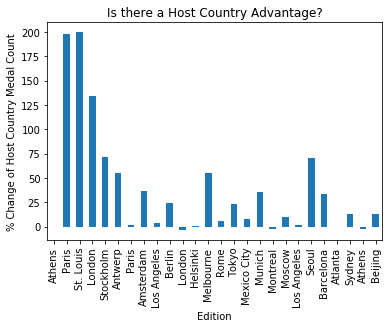

In [0]:
# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()